In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_x_1 = pd.read_csv('train_set_x_scaled.csv')
train_x_2 = pd.read_csv('train_set_x_reduced.csv')
train_x_3 = pd.read_csv('train_set_x_selected.csv')


In [ ]:
test_x_1 = pd.read_csv('test_set_x_scaled.csv')
test_x_2 = pd.read_csv('test_set_x_reduced.csv')
test_x_3 = pd.read_csv('test_set_x_selected.csv')

In [ ]:
ytrain = pd.read_csv('train_set_y.csv')
ytest = pd.read_csv('test_set_y.csv')

In [ ]:
train_x_1.head()

,Suburb_0,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,Suburb_8,Rooms,...,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
0,0,0,0,1,0,1,1,0,0,-0.977940,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0,1,1,0,1,0,1,1,-2.025789,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,0,0,1,0,0,1,0.069910,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,1,0,0,1,1,1,-0.977940,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,1,1,1,1,1,0,1.117759,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model.fit(train_x_1, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred = model.predict(test_x_1)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(ytest, pred)

161725.422537377

In [ ]:
mean_squared_error(ytest, pred)

71160399372.93114

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [3, 5, 7, 9],
          'learning_rate': [0.05, 0.1, 0.15, 0.2],
          'subsample': [0.6, 0.7, 0.8, 0.9],
          'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
          'gamma': [0, 1, 2, 3]}

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5,
                                   scoring='neg_mean_squared_error', cv=10, verbose=3, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(train_x_1, ytrain)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)



Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8;, score=-70783152431.545 total time=   3.7s
[CV 2/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8;, score=-74902095460.680 total time=   4.8s
[CV 3/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8;, score=-72294238213.058 total time=   3.0s
[CV 4/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8;, score=-64592795644.732 total time=   2.9s
[CV 5/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8;, score=-52975851806.029 total time=   3.5s
[CV 6/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8;, score=-60592390569.573 total time=   4.1s
[CV 7/10] END colsamp

In [ ]:

improved_xgb = xgb.XGBRegressor(subsample= 0.8,
                                n_estimators= 150,
                                max_depth= 7, learning_rate= 0.1,
                                gamma= 0, colsample_bytree= 0.7)

In [ ]:
improved_xgb.fit(train_x_1, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
improved_pred = improved_xgb.predict(train_x_1)

In [ ]:
improved_pred1 = improved_xgb.predict(test_x_1)

In [ ]:
mean_absolute_error(ytrain, improved_pred)

89093.64603763486

In [ ]:
mean_absolute_error(ytest, improved_pred1)

155563.46692846328

In [ ]:
mean_squared_error(ytrain,  improved_pred)

16632834606.255577

In [ ]:
mean_squared_error(ytest,  improved_pred1)

66869305277.39774

Text(0.5, 1.0, 'Feature Importance : XGBOOST')

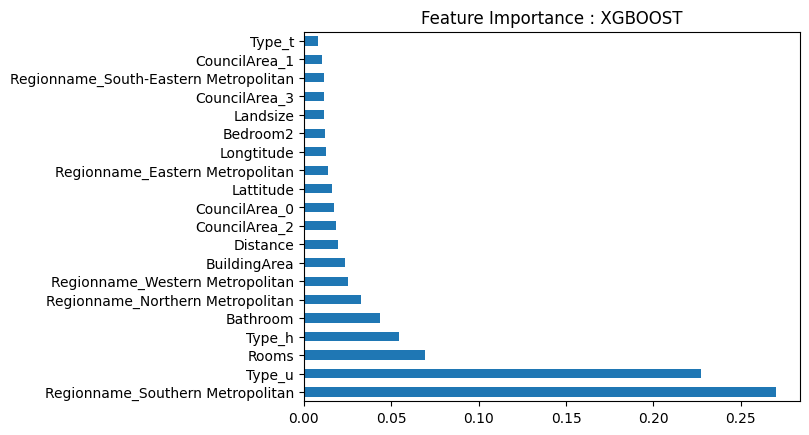

In [ ]:
feat_importances = pd.Series(improved_xgb.feature_importances_, index=train_x_1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance : XGBOOST')

<Figure size 100000x100000 with 0 Axes>

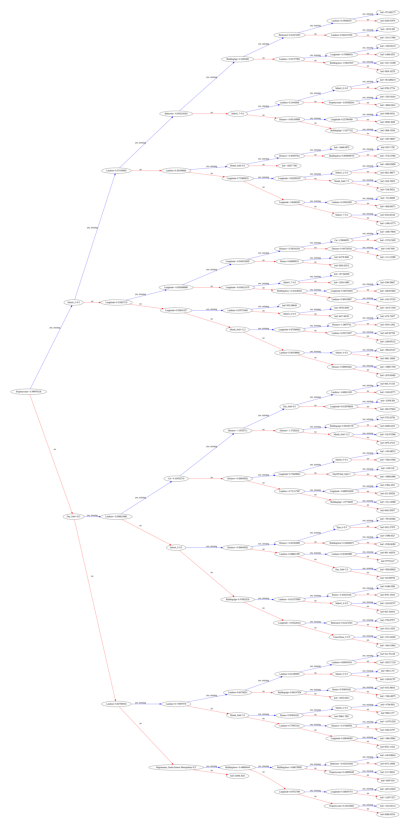

In [ ]:
from xgboost import plot_tree
plt.figure(figsize=(1000,1000))
plot_tree(improved_xgb, rankdir='LR',num_trees=-1)
plt.gcf().set_size_inches(18.5, 10.5)

plt.show()

In [ ]:
16632834606.255577